In [11]:
import ast
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.models as models
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline





In [19]:
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)

models_dict = {'resnet': resnet18, 'alexnet': alexnet, 'vgg': vgg16}

In [20]:
# obtain ImageNet labels
with open('imagenet1000_clsid_to_human.txt') as imagenet_classes_file:
    imagenet_classes_dict = ast.literal_eval(imagenet_classes_file.read())

In [50]:
# get_pet_labels
import os 
import pathlib
import os
import glob
import random
dirs = os.listdir("pet_images/")
petlabels_dic = {}
# print(dirs)
for image_file_name in dirs:
    label = ' '.join(image_file_name.split("_")[:-1])
    petlabels_dic[image_file_name] = label

print(petlabels_dic)


{'Great_pyrenees_05367.jpg': 'Great pyrenees', 'cat_07.jpg': 'cat', 'Saint_bernard_08010.jpg': 'Saint bernard', 'Boston_terrier_02303.jpg': 'Boston terrier', 'Dalmatian_04037.jpg': 'Dalmatian', 'fox_squirrel_01.jpg': 'fox squirrel', 'gecko_80.jpg': 'gecko', 'Great_dane_05320.jpg': 'Great dane', 'Beagle_01141.jpg': 'Beagle', 'German_shorthaired_pointer_04986.jpg': 'German shorthaired pointer', 'Golden_retriever_05257.jpg': 'Golden retriever', 'Poodle_07927.jpg': 'Poodle', 'Golden_retriever_05195.jpg': 'Golden retriever', 'cat_02.jpg': 'cat', 'cat_01.jpg': 'cat', 'Boston_terrier_02285.jpg': 'Boston terrier', 'Saint_bernard_08036.jpg': 'Saint bernard', 'Poodle_07956.jpg': 'Poodle', 'Cocker_spaniel_03750.jpg': 'Cocker spaniel', 'Golden_retriever_05223.jpg': 'Golden retriever', 'Boxer_02426.jpg': 'Boxer', 'Great_pyrenees_05435.jpg': 'Great pyrenees', 'Basenji_00974.jpg': 'Basenji', 'German_shepherd_dog_04890.jpg': 'German shepherd dog', 'Basset_hound_01034.jpg': 'Basset hound', 'Collie_0379

In [ ]:
#classify_images

In [53]:
img_path = "./pet_images/" + random.choice(list(petlabels_dic.keys()))
print(img_path)

./pet_images/Great_dane_05320.jpg


In [54]:
# load the image
img_pil = Image.open(img_path)


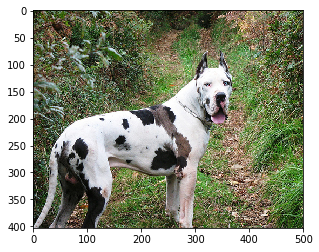

In [55]:
imshow(np.asarray(img_pil))

In [24]:
# define transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [25]:
# preprocess the image
img_tensor = preprocess(img_pil)

In [26]:

# resize the tensor (add dimension for batch)
img_tensor.unsqueeze_(0)



( 0 , 0 ,.,.) = 
  1.8037 -0.0287 -1.1075  ...   1.5639  1.5810  1.5639
  0.3823 -0.8849 -0.9877  ...   1.5982  1.5982  1.5810
 -1.0390 -1.0048  0.1083  ...   1.5982  1.5810  1.5810
           ...             ⋱             ...          
  0.0398  0.0398  0.0912  ...   0.5707  0.9132  1.2214
  0.0741  0.0569  0.0741  ...   1.7009  1.5639  1.5297
  0.0912  0.0912  0.0227  ...   1.4954  1.8037  1.8208

( 0 , 1 ,.,.) = 
  1.7283 -0.1800 -1.2654  ...   1.5182  1.5182  1.5007
  0.2402 -1.0378 -1.1253  ...   1.5707  1.5357  1.5182
 -1.1954 -1.1604 -0.0224  ...   1.5532  1.5532  1.5532
           ...             ⋱             ...          
 -0.0399 -0.0399 -0.0049  ...  -1.5630 -1.7731 -1.8256
 -0.0049 -0.0049 -0.0224  ...   0.1176 -0.2850 -0.5826
 -0.0049 -0.0224 -0.0574  ...  -0.5126  0.5903  0.7129

( 0 , 2 ,.,.) = 
  1.5768 -0.4624 -1.5953  ...   1.3154  1.3154  1.3328
 -0.0092 -1.3339 -1.4559  ...   1.3154  1.2805  1.2805
 -1.5081 -1.5081 -0.3230  ...   1.3502  1.3328  1.2457
           

In [27]:

# wrap input in variable
data = Variable(img_teJnsor, volatile=True) 


# apply model to input
model = models_dict['resnet']



# puts model in evaluation mode
# instead of (default)training mode
model = model.eval()



# apply data to model
output = model(data)



# return index corresponding to predicted class
pred_idx = output.data.numpy().argmax()



imagenet_classes_dict[pred_idx]


In [57]:
def get_pet_labels():
    dirs = os.listdir("pet_images/")
    petlabels_dic = {}
    # print(dirs)
    for image_file_name in dirs:
        label = ' '.join(image_file_name.split("_")[:-1])
        petlabels_dic[image_file_name] = label
    return petlabels_dic
   

In [56]:
def classifier(img_path, model_name):
    # load the image
    img_pil = Image.open(img_path)
    # define transforms
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    # preprocess the image
    img_tensor = preprocess(img_pil)
    # resize the tensor (add dimension for batch)
    img_tensor.unsqueeze_(0)
    # wrap input in variable
    data = Variable(img_tensor, volatile=True) 
    # apply model to input
    model = models_dict[model_name]
    # puts model in evaluation mode
    # instead of (default)training mode
    model = model.eval()
    # apply data to model
    output = model(data)
    # return index corresponding to predicted class
    pred_idx = output.data.numpy().argmax()
    return imagenet_classes_dict[pred_idx]

In [77]:
def classify_images():
    results_dic = {}
#     image_filename = random.choice(list(petlabels_dic.keys()))
    for image_filename in list(petlabels_dic.keys()):
        img_path = "./pet_images/" + image_filename
        label = petlabels_dic[image_filename]
        label = label.lower()
        classification = classifier(img_path, 'resnet')
        classification = classification.split(',')[0]
        classification = classification.lower()
        match = (1 if (label == classification) else 0)
#         print(classification)
#         print(label)
#         print(1 if (label == classification) else 0)
        results_dic[image_filename] = [label, classification, match]
    print(results_dic)
    return results_dic

In [80]:
results_dic = classify_images()

{'Great_pyrenees_05367.jpg': ['great pyrenees', 'kuvasz', 0], 'cat_07.jpg': ['cat', 'egyptian cat', 0], 'Dalmatian_04068.jpg': ['dalmatian', 'dalmatian', 1], 'Dalmatian_04017.jpg': ['dalmatian', 'dalmatian', 1], 'Boston_terrier_02303.jpg': ['boston terrier', 'boston bull', 0], 'Dalmatian_04037.jpg': ['dalmatian', 'dalmatian', 1], 'fox_squirrel_01.jpg': ['fox squirrel', 'fox squirrel', 1], 'gecko_80.jpg': ['gecko', 'tailed frog', 0], 'Great_dane_05320.jpg': ['great dane', 'great dane', 1], 'Beagle_01141.jpg': ['beagle', 'beagle', 1], 'Golden_retriever_05257.jpg': ['golden retriever', 'golden retriever', 1], 'Poodle_07927.jpg': ['poodle', 'standard poodle', 0], 'great_horned_owl_02.jpg': ['great horned owl', 'great grey owl', 0], 'Boston_terrier_02259.jpg': ['boston terrier', 'boston bull', 0], 'cat_01.jpg': ['cat', 'norwegian elkhound', 0], 'Beagle_01125.jpg': ['beagle', 'beagle', 1], 'Boxer_02426.jpg': ['boxer', 'boxer', 1], 'Boston_terrier_02285.jpg': ['boston terrier', 'boston bull',

In [81]:
list_of_dognames = []

with open('dognames.txt') as f:
    for line in f:
        add_dogname = [line.strip() for line in line.split(',')]
        list_of_dognames = list_of_dognames + add_dogname
print('list_of_dognames: ', list_of_dognames)
for key in list(results_dic.keys()):
    pet_image_label = results_dic[key][0]
    classifier_label = results_dic[key][1]
    results_dic[key].append(1 if pet_image_label in list_of_dognames else 0)
    results_dic[key].append(1 if classifier_label in list_of_dognames else 0)
print('results_dic: ', results_dic)

list_of_dognames:  ['chihuahua', 'japanese spaniel', 'maltese dog', 'maltese terrier', 'maltese', 'pekinese', 'pekingese', 'peke', 'shih-tzu', 'blenheim spaniel', 'papillon', 'toy terrier', 'rhodesian ridgeback', 'afghan hound', 'afghan', 'basset', 'basset hound', 'beagle', 'bloodhound', 'sleuthhound', 'bluetick', 'black-and-tan coonhound', 'walker hound', 'walker foxhound', 'english foxhound', 'redbone', 'borzoi', 'russian wolfhound', 'irish wolfhound', 'italian greyhound', 'whippet', 'ibizan hound', 'ibizan podenco', 'norwegian elkhound', 'elkhound', 'otterhound', 'otter hound', 'saluki', 'gazelle hound', 'scottish deerhound', 'deerhound', 'weimaraner', 'staffordshire bullterrier', 'staffordshire bull terrier', 'american staffordshire terrier', 'staffordshire terrier', 'american pit bull terrier', 'pit bull terrier', 'bedlington terrier', 'border terrier', 'kerry blue terrier', 'irish terrier', 'norfolk terrier', 'norwich terrier', 'yorkshire terrier', 'wire-haired fox terrier', 'lak

In [85]:
#calculates_results_stats
results_stats = {}
number_of_matched = 0
number_of_dogs = 0
number_of_classified_dogs = 0
for key in list(results_dic.keys()):
    number_of_matched = number_of_matched + results_dic[key][2]
    number_of_dogs = number_of_dogs + results_dic[key][3]
    number_of_classified_dogs = number_of_classified_dogs + results_dic[key][4]
results_stats['n_matched'] = number_of_matched
results_stats['n_dogs'] = number_of_dogs
results_stats['n_classified_as_dog'] = number_of_classified_dogs
results_stats['pct_matched'] = number_of_matched/len(list(results_dic.keys()))
results_stats['pct_dogs'] = number_of_dogs/len(list(results_dic.keys()))
results_stats['pct_classified_as_dog'] = number_of_classified_dogs/len(list(results_dic.keys()))
print('results_stats: ', results_stats)


number_of_matched:  21
number_of_dogs:  30
number_of_classified_dogs:  31
results_stats:  {'n_dogs': 30, 'n_classified_as_dog': 31, 'pct_dogs': 0.75, 'pct_matched': 0.525, 'pct_classified_as_dog': 0.775, 'n_matched': 21}


In [ ]:
#print_results
